### Goals and Objectives

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations..

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct

In [6]:
#Removing column Prospect ID
df.drop(labels=['Prospect ID','Lead Number'],axis=1,inplace=True)
df.head(20)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


#### Few columns have 'Select' in their entries, it's basically the value when one doesn't choose any option.So, it can be replaced with null values.

In [8]:
# Replacing Select with NaN

df.replace('Select',np.NaN,inplace=True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#Checking the  percentage of Null Values in each column

round(100*(df.isna().sum()/len(df)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
#Dropping the columns which has more than 40% of null values
df.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)
df.shape

(9240, 28)

In [11]:
#Dropping the irrelevant columns
df.drop(['A free copy of Mastering The Interview','I agree to pay the amount through cheque','Tags','Last Notable Activity','Last Activity'],axis=1,inplace=True)

In [12]:
# Again Checking the  percentage of Null Values in each column
round(100*(df.isna().sum()/len(df)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

<Axes: xlabel='TotalVisits', ylabel='Density'>

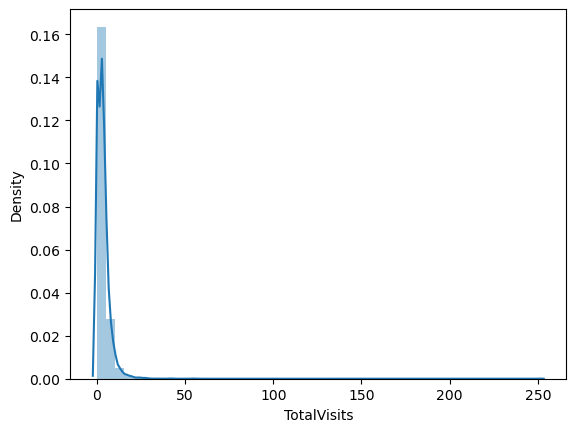

In [13]:
#Checking the distribution for the column TotalVisits
sns.distplot(df.TotalVisits)

In [14]:
#imputing TotalVisits with the median
df.TotalVisits.fillna(df.TotalVisits.median(),inplace=True)

<Axes: xlabel='Page Views Per Visit', ylabel='Density'>

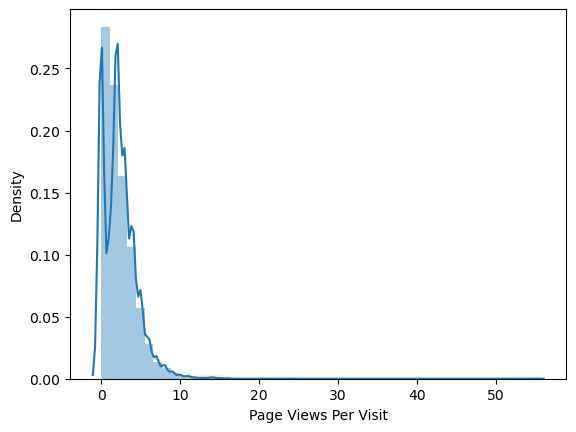

In [15]:
#Checking the distribution of the column Page Views Per Visit
sns.distplot(df['Page Views Per Visit'])

In [16]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

In [17]:
#Rechecking the null values
round(df.isna().sum()/len(df),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Country                                          0.27
Specialization                                   0.37
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [18]:
# dropping city and country variables won't be any use in our analysis
df.drop(['City','Country'],axis=1,inplace=True)

In [19]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [20]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [21]:
# Checking the value counts for the Specialization variable
df['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [22]:
#Checking the values of Specialization column in percentage
100*df.Specialization.value_counts(normalize=True,dropna=False)

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [23]:
#imputing the null values in the Specialization column with the mode
df.Specialization.fillna(df.Specialization.mode()[0],inplace=True)

In [24]:
df['What is your current occupation'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238           NaN
9239    Unemployed
Name: What is your current occupation, Length: 9240, dtype: object>

In [25]:
#imputing the null values in the 'What is your current occupation' column with the mode
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace=True)

In [26]:
# Check the number of null values again
df.isnull().sum()

Lead Origin                                0
Lead Source                               36
Do Not Email                               0
Do Not Call                                0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Specialization                             0
What is your current occupation            0
Search                                     0
Magazine                                   0
Newspaper Article                          0
X Education Forums                         0
Newspaper                                  0
Digital Advertisement                      0
Through Recommendations                    0
Receive More Updates About Our Courses     0
Update me on Supply Chain Content          0
Get updates on DM Content                  0
dtype: int64

In [27]:
df.shape

(9240, 20)

In [28]:
# Dropping the null values rows in the column 'Lead Source'
df = df[~pd.isnull(df['Lead Source'])]

In [29]:
# Rechecking the number of null values 
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Receive More Updates About Our Courses    0
Update me on Supply Chain Content         0
Get updates on DM Content                 0
dtype: int64

#### The data is now cleaned as we have no null values

## Preparing the data for Model Building

In [32]:
#separating the data into numerical and categorical variables
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

numeric_data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.00
1,0,5.0,674,2.50
2,1,2.0,1532,2.00
3,0,1.0,305,1.00
4,1,2.0,1428,1.00
...,...,...,...,...
9235,1,8.0,1845,2.67
9236,0,2.0,238,2.00
9237,0,2.0,199,2.00
9238,1,3.0,499,3.00


In [33]:
categorical_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content
0,API,Olark Chat,No,No,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,No,No,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,Business Administration,Student,No,No,No,No,No,No,No,No,No,No
3,Landing Page Submission,Direct Traffic,No,No,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No
9237,Landing Page Submission,Direct Traffic,Yes,No,Business Administration,Unemployed,No,No,No,No,No,No,No,No,No,No
9238,Landing Page Submission,Google,No,No,Human Resource Management,Unemployed,No,No,No,No,No,No,No,No,No,No


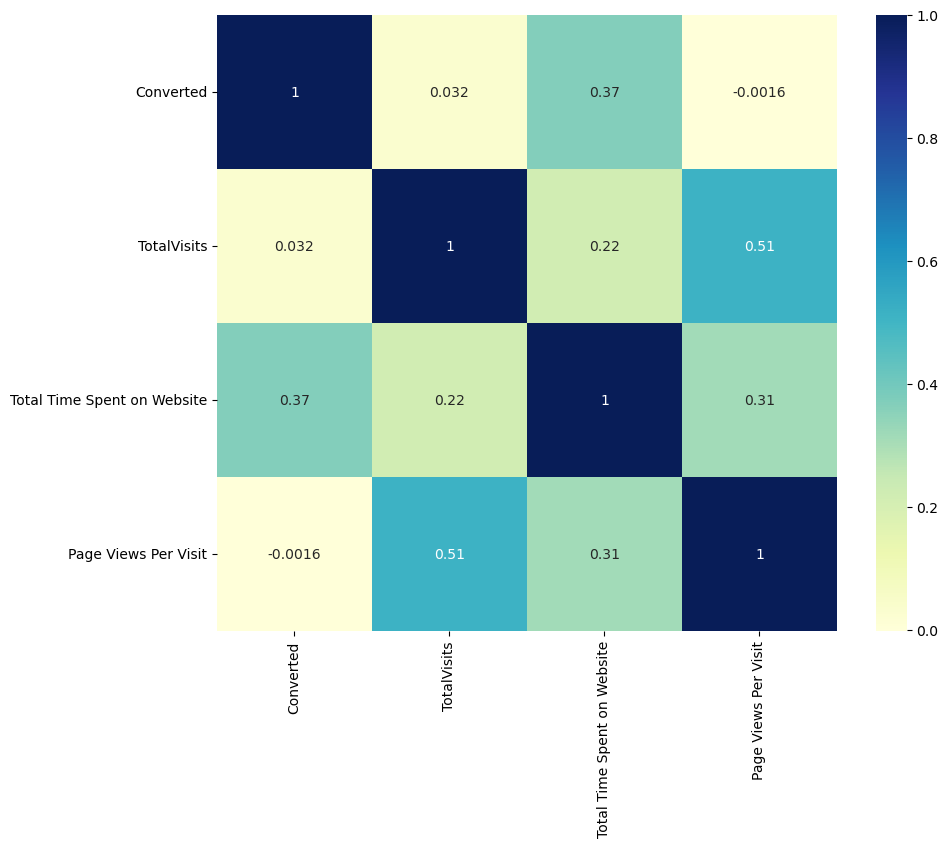

In [34]:
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [35]:
#Check the % of Data that has Converted Values = 1:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.374619730551935

### Converted is the target variable, which Indicates whether a lead has been successfully converted (1) or not (0).

### Univariate Analysis

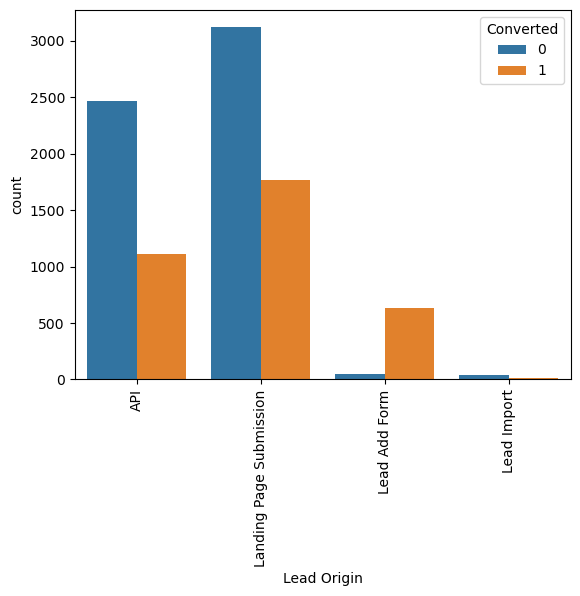

In [38]:
df1=sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
df1.set_xticklabels(df1.get_xticklabels(),rotation=90)
plt.show()

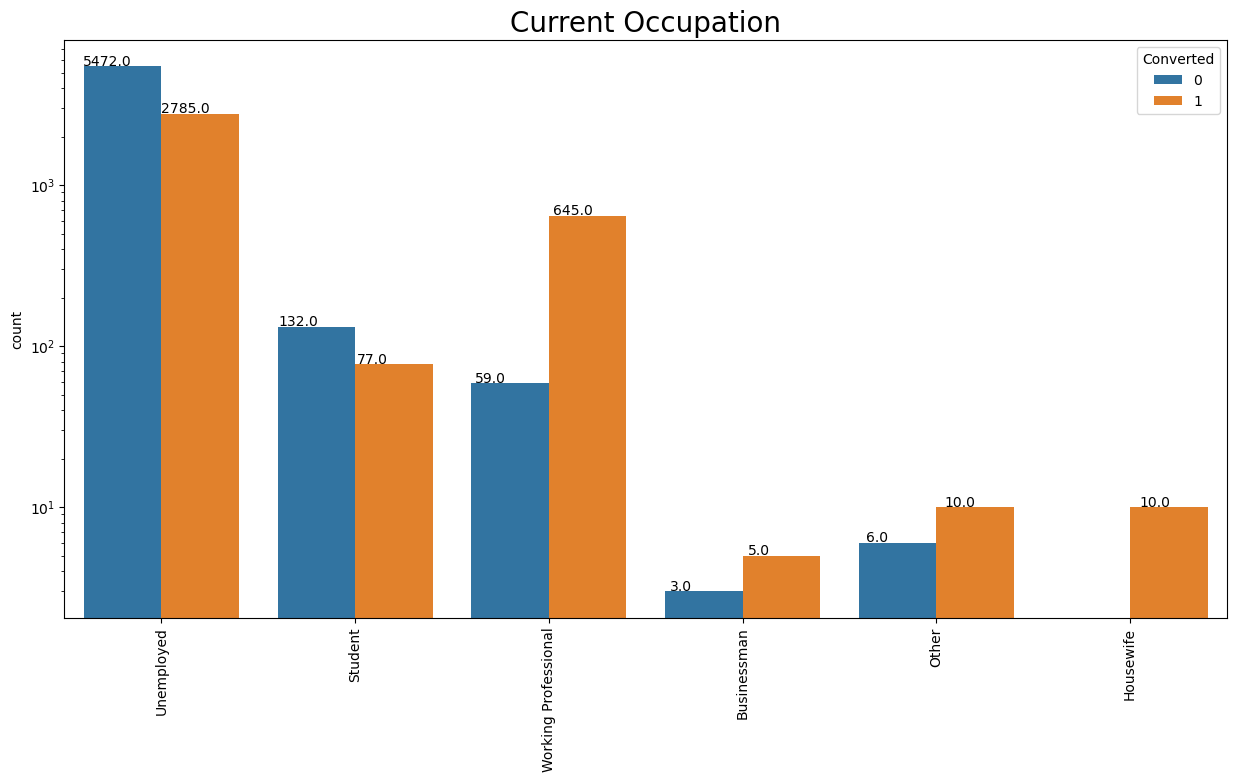

In [39]:
fig, axs = plt.subplots(figsize = (15,7.5))
df3=sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
for p in df3.patches:
    df3.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
df3.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation',fontsize=20)

df3.set_yscale('log')
plt.show()

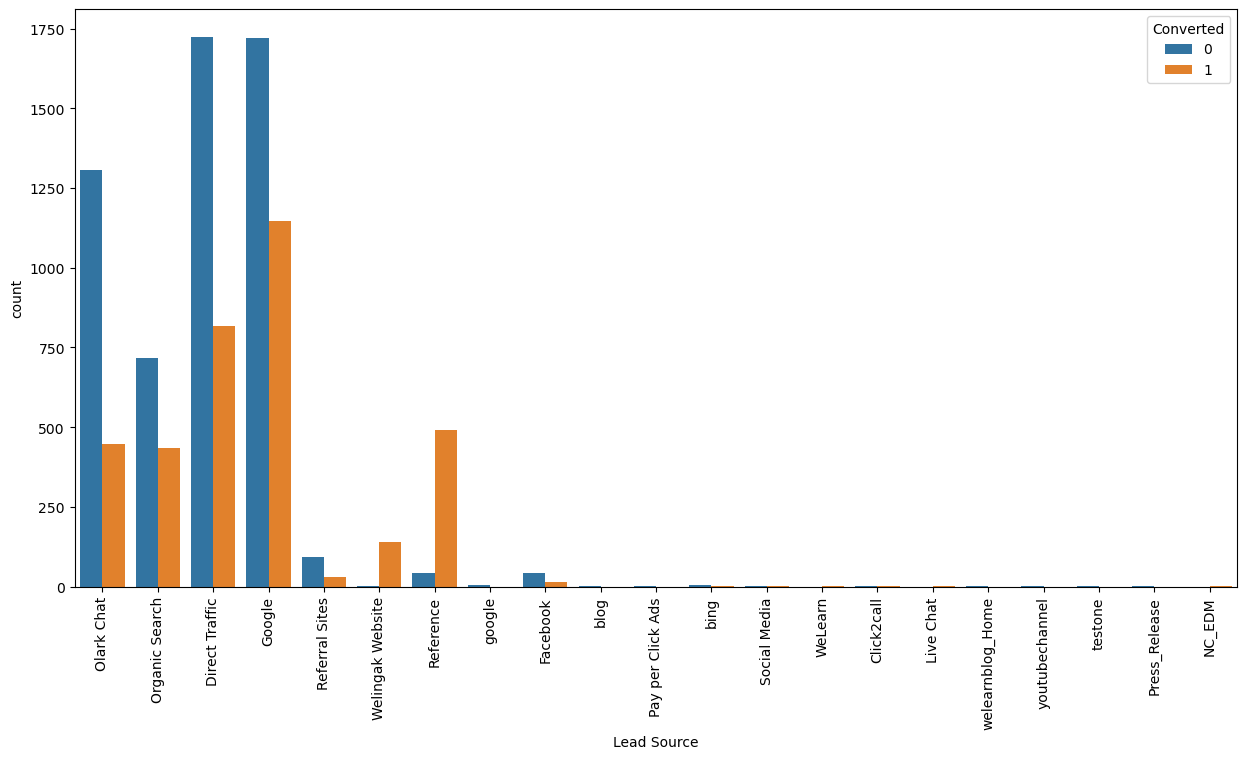

In [40]:
fig, axs = plt.subplots(figsize = (15,7.5))
df2=sns.countplot(x = "Lead Source", hue = "Converted", data = df)
df2.set_xticklabels(df2.get_xticklabels(),rotation=90)
plt.show()

### Bivariate Analysis

<Axes: xlabel='Do Not Call', ylabel='count'>

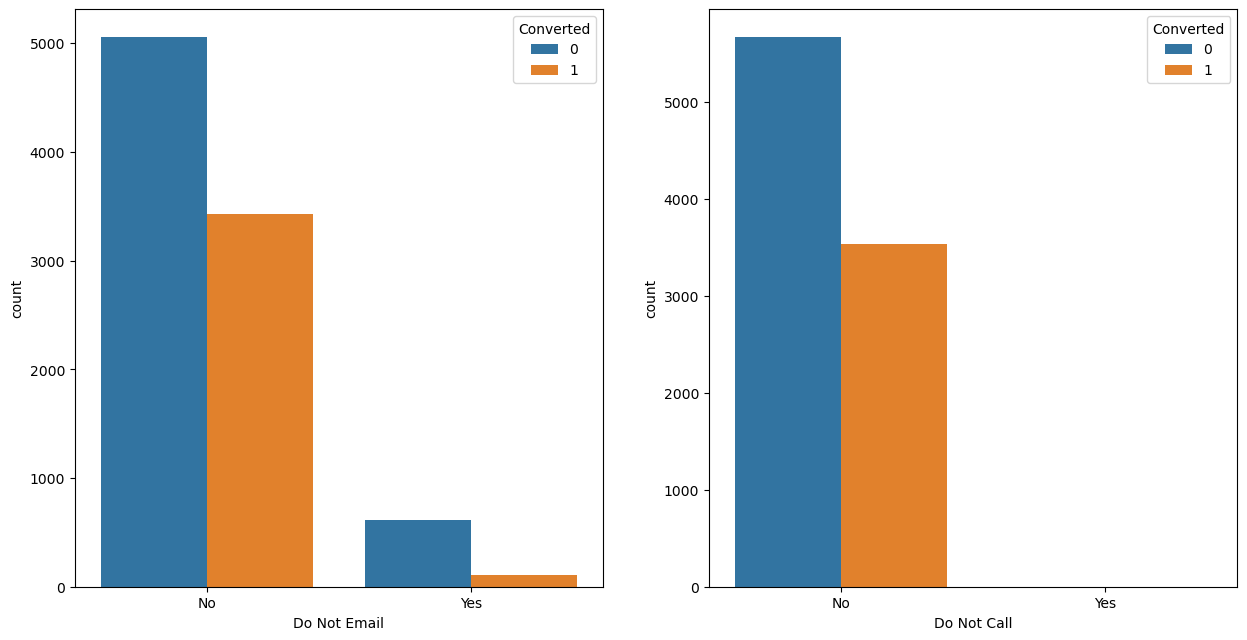

In [42]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])

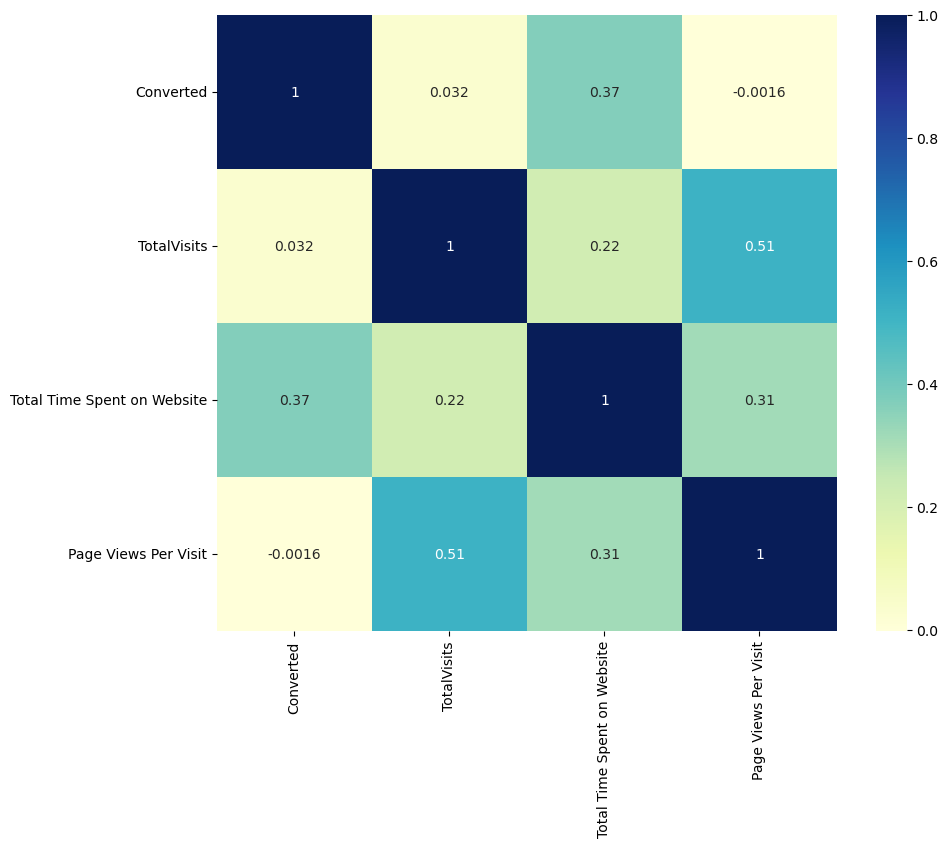

In [43]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [44]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9204.000000
mean        3.449587
std         4.824662
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: ylabel='TotalVisits'>

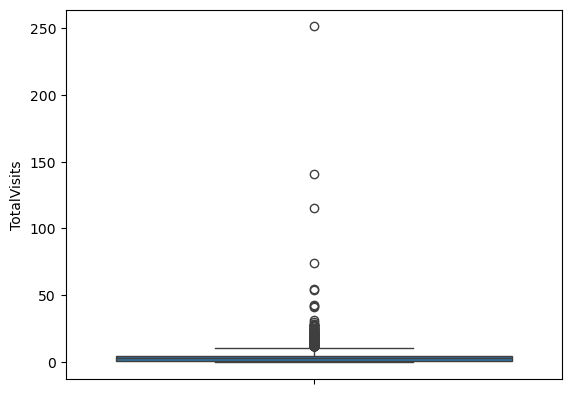

In [45]:
sns.boxplot(df['TotalVisits'])

<Axes: ylabel='Total Time Spent on Website'>

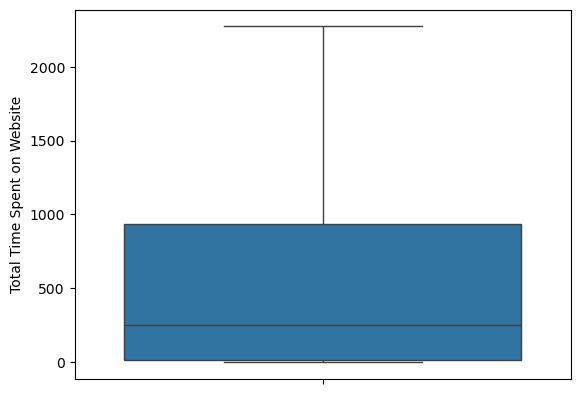

In [46]:
sns.boxplot(df['Total Time Spent on Website'])

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

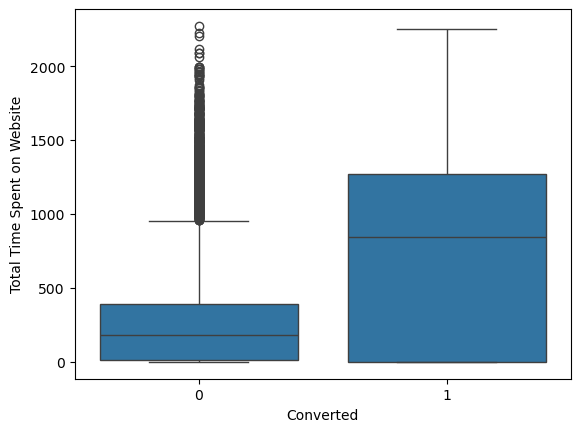

In [47]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

<Axes: ylabel='Page Views Per Visit'>

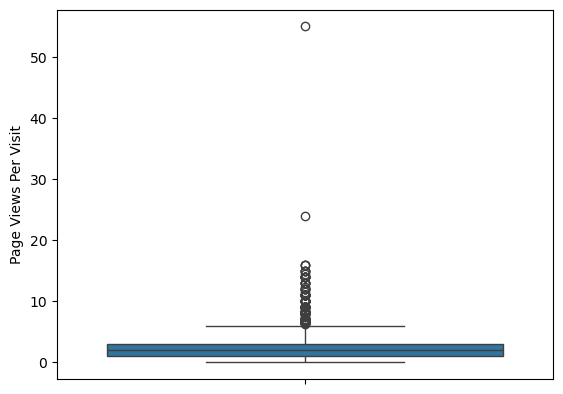

In [48]:
sns.boxplot(df['Page Views Per Visit'])

In [49]:
# Capping the outliers to 95% value for analysis
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='Page Views Per Visit'>

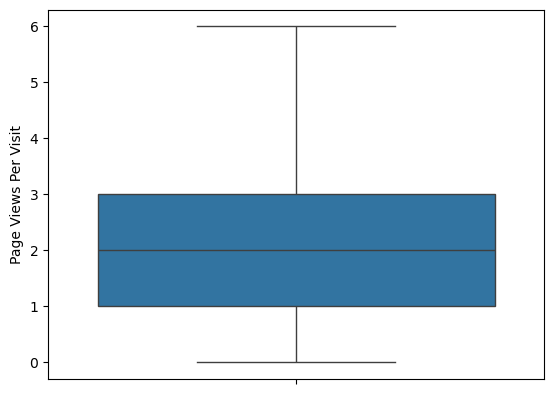

In [50]:
sns.boxplot(df['Page Views Per Visit'])

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

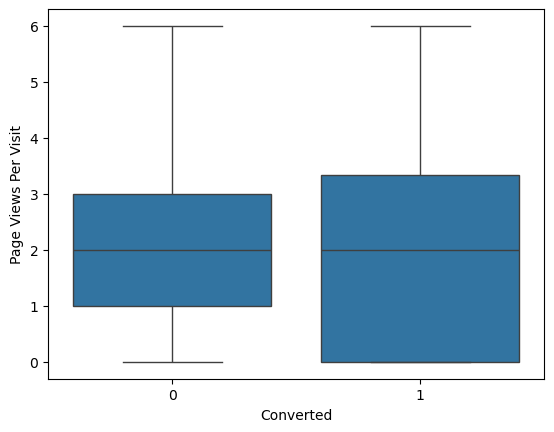

In [51]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

In [52]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [53]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content
0,API,Olark Chat,0,0,0,0.0,0,0.0,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No
1,API,Organic Search,0,0,0,5.0,674,2.5,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,No,No,No,No,No,No
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No


### Dummy Variable Creation

In [55]:
# Getting categorical columns
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content'],
      dtype='object')

In [56]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content']], drop_first=True)
                               
# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [57]:
print(df.dtypes)

Lead Origin                                              object
Lead Source                                              object
Do Not Email                                              int64
Do Not Call                                               int64
Converted                                                 int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
Specialization                                           object
What is your current occupation                          object
Search                                                   object
Magazine                                                 object
Newspaper Article                                        object
X Education Forums                                       object
Newspaper                                                object
Digital Advertisement                   

In [58]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [59]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,API,Olark Chat,0,0,0,0.0,0,0.0,Finance Management,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Finance Management,Unemployed,...,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Finance Management,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [60]:
# Dropping variables for which the dummy variables have been created

df = df.drop(['Lead Origin', 'Lead Source','Specialization','Magazine','Newspaper','Digital Advertisement','What is your current occupation'], axis=1)

In [61]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Through Recommendations,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,0,0,0,0.0,0,0.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,No,No,No,No,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,No,No,No,No,...,0,0,1,0,0,0,0,0,0,0


Notice that when you got the value counts of all the columns, there were a few columns in which only one value was present for all the data points. As we can see, all of the values for these variables are No, we can drop these columns as they won't help in our analysis.

In [63]:
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'],axis=1,inplace=True)

In [64]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index([], dtype='object')

In [66]:
df.shape

(9204, 39)

In [67]:
# Putting target variable in y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [68]:
# Putting the target variable in y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
# Splitting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes
5310,0,0.028369,0.044454,0.666667,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2181,0,0.056738,0.115317,1.000000,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8215,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8887,0,0.014184,0.101232,0.333333,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7920,0,0.028369,0.086708,0.666667,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Checking the Churn Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.374619730551935

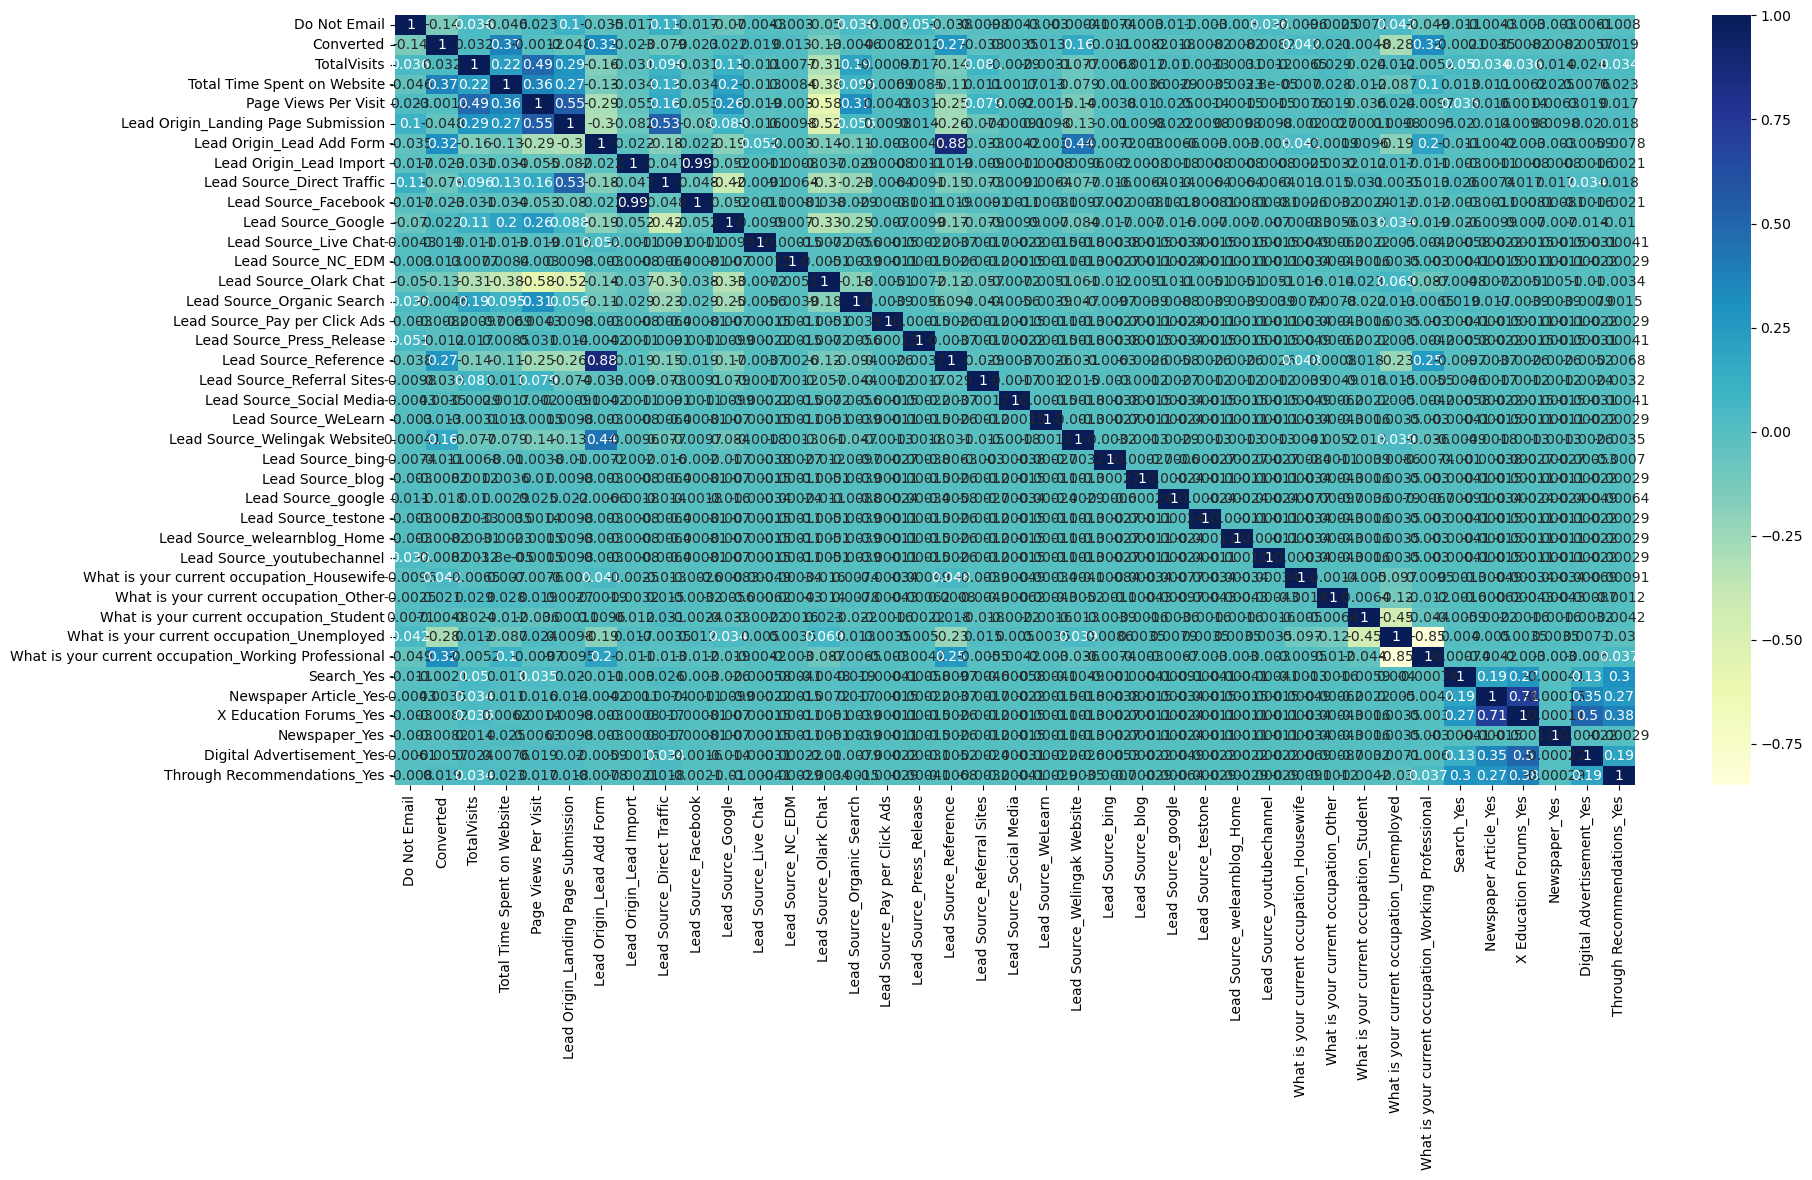

In [72]:
# Correlation matrix for total data set
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

It is not possible to deal with all the variables. So thet the best way is to select a small set of features using RFE method.

In [74]:
rfe = RFE(estimator=LogisticRegression(),n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

In [75]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 12),
 ('Lead Source_Press_Release', False, 5),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn', False, 10),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 20),
 ('Lead Source_blog', False, 24),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 11),
 ('Lead Source_welearnblog_Home

In [76]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Newspaper_Yes'],
      dtype='object')

In [77]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'What is your current occupation_Other', 'Search_Yes',
       'Newspaper Article_Yes', 'X Education Forums_Yes',
       'Digital Advertisement_Yes', 'Through Recommendations_Yes'],
      dtype='object')

In [78]:
# Importing statsmodels

import statsmodels.api as sm

In [79]:
# Selecting only the columns selected by RFE

X_train = X_train[col]

### Model 1

In [81]:
# Fitting a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3048.6
Date:                Tue, 18 Feb 2025   Deviance:                       6097.1
Time:                        07:59:43   Pearson chi2:                 7.71e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3264
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4475      0.574     -2.522      0.012      -2.573      -0.322
Do Not Email                                            -1.5067      0.158     -9.544      0.000      -1.816      -1.197
TotalVisits                                              3.2139      1.099      2.923      0.003       1.059       5.369
Total Time Spent on Website                              4.6520      0.156     29.846      0.000       4.347       4.958
Lead Origin_Lead Add Form                                2.7156      1.187      2.287      0.022       0.388       5.043
Lead Source_Live Chat                                   21.9610   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      22.6108   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.8933      0.096      9.262      0.000       0.704       1.082
Lead Source_Reference                                    1.1997      1.203      0.997      0.319      -1.159       3.558
Lead Source_Welingak Website                             4.1528      1.559      2.664      0.008       1.098       7.208
Lead Source_google                                     -22.0260   2.21e+04     -0.001      0.999   -4.33e+04    4.33e+04
What is your current occupation_Housewife               22.1348   1.63e+04      0.001      0.999   -3.19e+04    3.19e+04
What is your current occupation_Student                 -0.3833      0.604     -0.634      0.526      -1.567       0.801
What is your current occupation_Unemployed              -0.6630      0.569     -1.165      0.244      -1.779       0.453
What is your current occupation_Working Professional     2.0875      0.594      3.517      0.000       0.924       3.251
Newspaper_Yes                                          -24.3936   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
========================================================================================================================
"""

In [82]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,98.10
7,Lead Source_Reference,77.60
8,Lead Source_Welingak Website,21.23
12,What is your current occupation_Unemployed,3.85
2,Total Time Spent on Website,2.27
1,TotalVisits,2.03
6,Lead Source_Olark Chat,1.69
13,What is your current occupation_Working Profes...,1.43
4,Lead Source_Live Chat,1.40
0,Do Not Email,1.10


Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [85]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

### Model 2

In [87]:
# Refitting the model with the new set of features
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3049.0
Date:                Tue, 18 Feb 2025   Deviance:                       6097.9
Time:                        07:59:44   Pearson chi2:                 7.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3263
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4456      0.574     -2.519      0.012      -2.570      -0.321
Do Not Email                                            -1.5056      0.158     -9.541      0.000      -1.815      -1.196
TotalVisits                                              3.2063      1.099      2.917      0.004       1.052       5.361
Total Time Spent on Website                              4.6507      0.156     29.839      0.000       4.345       4.956
Lead Origin_Lead Add Form                                3.8905      0.207     18.779      0.000       3.484       4.297
Lead Source_Live Chat                                   20.7854   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      22.6110   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.8920      0.096      9.247      0.000       0.703       1.081
Lead Source_Welingak Website                             2.9768      1.029      2.893      0.004       0.960       4.993
Lead Source_google                                     -22.0259   2.21e+04     -0.001      0.999   -4.33e+04    4.33e+04
What is your current occupation_Housewife               22.1349   1.63e+04      0.001      0.999   -3.19e+04     3.2e+04
What is your current occupation_Student                 -0.3834      0.604     -0.635      0.526      -1.567       0.800
What is your current occupation_Unemployed              -0.6642      0.569     -1.167      0.243      -1.780       0.451
What is your current occupation_Working Professional     2.0871      0.593      3.518      0.000       0.924       3.250
Newspaper_Yes                                          -24.3927   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
========================================================================================================================
"""

In [88]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,3.84
2,Total Time Spent on Website,2.27
1,TotalVisits,2.03
6,Lead Source_Olark Chat,1.69
3,Lead Origin_Lead Add Form,1.58
12,What is your current occupation_Working Profes...,1.43
7,Lead Source_Welingak Website,1.29
0,Do Not Email,1.10
10,What is your current occupation_Student,1.07
4,Lead Source_Live Chat,1.01


In [89]:
# Droping `What is your current occupation_Housewife`.
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

### Model 3

In [91]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3051.5
Date:                Tue, 18 Feb 2025   Deviance:                       6103.0
Time:                        07:59:44   Pearson chi2:                 7.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3257
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9303      0.536     -1.735      0.083      -1.981       0.121
Do Not Email                                            -1.5075      0.158     -9.546      0.000      -1.817      -1.198
TotalVisits                                              3.1534      1.098      2.873      0.004       1.002       5.305
Total Time Spent on Website                              4.6450      0.156     29.825      0.000       4.340       4.950
Lead Origin_Lead Add Form                                3.8873      0.207     18.770      0.000       3.481       4.293
Lead Source_Live Chat                                   20.7846   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      22.6120   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.8871      0.096      9.204      0.000       0.698       1.076
Lead Source_Welingak Website                             2.9768      1.029      2.893      0.004       0.960       4.993
Lead Source_google                                     -22.0255   2.21e+04     -0.001      0.999   -4.33e+04    4.33e+04
What is your current occupation_Student                 -0.8948      0.569     -1.572      0.116      -2.011       0.221
What is your current occupation_Unemployed              -1.1756      0.532     -2.208      0.027      -2.219      -0.132
What is your current occupation_Working Professional     1.5753      0.558      2.823      0.005       0.482       2.669
Newspaper_Yes                                          -24.3884   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
========================================================================================================================
"""

In [92]:
# The column Lead Source_google seems to have high p-value
X_train.drop(['Lead Source_google'],axis=1,inplace=True)

### Model 4

In [94]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3053.4
Date:                Tue, 18 Feb 2025   Deviance:                       6106.8
Time:                        07:59:45   Pearson chi2:                 7.68e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3253
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9294      0.536     -1.733      0.083      -1.980       0.122
Do Not Email                                            -1.5057      0.158     -9.535      0.000      -1.815      -1.196
TotalVisits                                              3.1368      1.097      2.859      0.004       0.987       5.287
Total Time Spent on Website                              4.6432      0.156     29.826      0.000       4.338       4.948
Lead Origin_Lead Add Form                                3.8881      0.207     18.774      0.000       3.482       4.294
Lead Source_Live Chat                                   19.7848   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Lead Source_NC_EDM                                      21.6145   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                                   0.8880      0.096      9.214      0.000       0.699       1.077
Lead Source_Welingak Website                             2.9764      1.029      2.893      0.004       0.960       4.993
What is your current occupation_Student                 -0.8954      0.569     -1.573      0.116      -2.011       0.220
What is your current occupation_Unemployed              -1.1774      0.532     -2.212      0.027      -2.221      -0.134
What is your current occupation_Working Professional     1.5748      0.558      2.822      0.005       0.481       2.668
Newspaper_Yes                                          -23.3848   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
========================================================================================================================
"""

In [95]:
# The column Lead Source_Live Chat seems to have a high p-value
X_train.drop(['Lead Source_Live Chat'],axis= 1,inplace=True)

### Model 5

In [97]:
# Refitting the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3053.7
Date:                Tue, 18 Feb 2025   Deviance:                       6107.5
Time:                        07:59:45   Pearson chi2:                 7.70e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3253
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9297      0.536     -1.734      0.083      -1.981       0.121
Do Not Email                                            -1.5061      0.158     -9.537      0.000      -1.816      -1.197
TotalVisits                                              3.1364      1.097      2.859      0.004       0.986       5.287
Total Time Spent on Website                              4.6431      0.156     29.824      0.000       4.338       4.948
Lead Origin_Lead Add Form                                3.8990      0.207     18.840      0.000       3.493       4.305
Lead Source_NC_EDM                                      20.6145   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Olark Chat                                   0.8880      0.096      9.213      0.000       0.699       1.077
Lead Source_Welingak Website                             2.9655      1.029      2.883      0.004       0.949       4.982
What is your current occupation_Student                 -0.8954      0.569     -1.573      0.116      -2.011       0.221
What is your current occupation_Unemployed              -1.1770      0.532     -2.211      0.027      -2.220      -0.134
What is your current occupation_Working Professional     1.5748      0.558      2.822      0.005       0.481       2.669
Newspaper_Yes                                          -22.3848   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
========================================================================================================================
"""

In [98]:
# The column Lead Source_NC_EDM seems to have a high p-value
X_train.drop(['Lead Source_NC_EDM'],axis = 1,inplace=True)

### Model 6

In [100]:
# Refitting the model with the new set of features

logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3054.4
Date:                Tue, 18 Feb 2025   Deviance:                       6108.9
Time:                        07:59:45   Pearson chi2:                 7.70e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3251
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9304      0.536     -1.735      0.083      -1.981       0.121
Do Not Email                                            -1.5069      0.158     -9.541      0.000      -1.816      -1.197
TotalVisits                                              3.1467      1.097      2.868      0.004       0.996       5.297
Total Time Spent on Website                              4.6442      0.156     29.830      0.000       4.339       4.949
Lead Origin_Lead Add Form                                3.8990      0.207     18.840      0.000       3.493       4.305
Lead Source_Olark Chat                                   0.8879      0.096      9.212      0.000       0.699       1.077
Lead Source_Welingak Website                             2.9656      1.029      2.883      0.004       0.949       4.982
What is your current occupation_Student                 -0.8951      0.569     -1.572      0.116      -2.011       0.221
What is your current occupation_Unemployed              -1.1763      0.532     -2.209      0.027      -2.220      -0.133
What is your current occupation_Working Professional     1.5751      0.558      2.822      0.005       0.481       2.669
Newspaper_Yes                                          -22.3865   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
========================================================================================================================
"""

In [101]:
# The column Newspaper_Yes seems to have a high p-value
X_train.drop(['Newspaper_Yes'],axis= 1,inplace=True)

### Model 7

In [103]:
# Refitting the model with the new set of features

logm7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3056.4
Date:                Tue, 18 Feb 2025   Deviance:                       6112.8
Time:                        07:59:45   Pearson chi2:                 7.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3247
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9256      0.536     -1.727      0.084      -1.976       0.125
Do Not Email                                            -1.5050      0.158     -9.533      0.000      -1.814      -1.196
TotalVisits                                              3.1089      1.096      2.837      0.005       0.961       5.257
Total Time Spent on Website                              4.6343      0.156     29.801      0.000       4.330       4.939
Lead Origin_Lead Add Form                                3.8960      0.207     18.828      0.000       3.490       4.302
Lead Source_Olark Chat                                   0.8851      0.096      9.188      0.000       0.696       1.074
Lead Source_Welingak Website                             2.9650      1.029      2.882      0.004       0.949       4.981
What is your current occupation_Student                 -0.8963      0.569     -1.575      0.115      -2.012       0.219
What is your current occupation_Unemployed              -1.1780      0.532     -2.213      0.027      -2.221      -0.135
What is your current occupation_Working Professional     1.5735      0.558      2.820      0.005       0.480       2.667
========================================================================================================================
"""

In [104]:
# The column What is your current occupation_Student seems to have a high p-value
X_train.drop(['What is your current occupation_Student'],axis=1,inplace=True)

### Model 8

In [106]:
# Refitting the model with the new set of features

logm8 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.7
Date:                Tue, 18 Feb 2025   Deviance:                       6115.5
Time:                        07:59:45   Pearson chi2:                 7.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3244
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7006      0.197     -8.615      0.000      -2.088      -1.314
Do Not Email                                            -1.5057      0.158     -9.550      0.000      -1.815      -1.197
TotalVisits                                              3.1625      1.096      2.885      0.004       1.014       5.311
Total Time Spent on Website                              4.6393      0.155     29.836      0.000       4.335       4.944
Lead Origin_Lead Add Form                                3.8998      0.207     18.851      0.000       3.494       4.305
Lead Source_Olark Chat                                   0.8851      0.096      9.187      0.000       0.696       1.074
Lead Source_Welingak Website                             2.9634      1.029      2.881      0.004       0.947       4.980
What is your current occupation_Unemployed              -0.4056      0.190     -2.139      0.032      -0.777      -0.034
What is your current occupation_Working Professional     2.3461      0.253      9.278      0.000       1.850       2.842
========================================================================================================================
"""

#### All the p-values are now in the appropriate range(0.05). Let's also check the VIFs again in case we had missed something.

In [108]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,3.64
2,Total Time Spent on Website,2.20
1,TotalVisits,1.99
4,Lead Source_Olark Chat,1.62
3,Lead Origin_Lead Add Form,1.54
7,What is your current occupation_Working Profes...,1.40
5,Lead Source_Welingak Website,1.29
0,Do Not Email,1.10


#### Both the p-values and VIFs seem to be decent enough for all the variables. So let's make predictions using this final set of features.

In [110]:
# Predicting the train variables
X_train_sm = sm.add_constant(X_train)
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5310    0.140600
2181    0.199114
8215    0.227734
8887    0.169136
7920    0.165994
4947    0.915049
3073    0.507873
2722    0.904153
499     0.227734
8330    0.939251
dtype: float64

In [111]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:9]

array([0.1406002 , 0.1991138 , 0.22773376, 0.16913632, 0.16599434,
       0.915049  , 0.50787297, 0.90415257, 0.22773376])

In [112]:
# Create a new dataframe containing the actual churn flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.140600
1,0,0.199114
2,0,0.227734
3,0,0.169136
4,0,0.165994


In [113]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [114]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.140600,0
1,0,0.199114,0
2,0,0.227734,0
3,0,0.169136,0
4,0,0.165994,0


### Evaluating the Model

In [116]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3415  485]
 [ 893 1649]]


### Accuracy

In [118]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7860912760012418


In [119]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# SENSITIVITY
TP/(TP+FN)

0.6487018095987411

In [121]:
# SPECIFICITY 
TN/(TN+FP)

0.8756410256410256

In [122]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

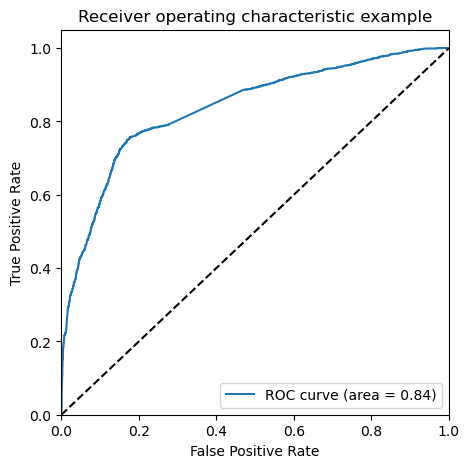

In [124]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the ROC curve is 0.84, indicating a strong model. We should also evaluate the sensitivity and specificity tradeoff to determine the optimal cutoff point.

In [126]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.140600,0,1,1,0,0,0,0,0,0,0,0
1,0,0.199114,0,1,1,0,0,0,0,0,0,0,0
2,0,0.227734,0,1,1,1,0,0,0,0,0,0,0
3,0,0.169136,0,1,1,0,0,0,0,0,0,0,0
4,0,0.165994,0,1,1,0,0,0,0,0,0,0,0


In [127]:
#  Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394598  1.000000  0.000000
0.1   0.1  0.445514  0.994886  0.087436
0.2   0.2  0.635362  0.903226  0.460769
0.3   0.3  0.789041  0.762785  0.806154
0.4   0.4  0.798199  0.717545  0.850769
0.5   0.5  0.786091  0.648702  0.875641
0.6   0.6  0.768705  0.554681  0.908205
0.7   0.7  0.746973  0.446499  0.942821
0.8   0.8  0.721670  0.336743  0.972564
0.9   0.9  0.683173  0.207710  0.993077


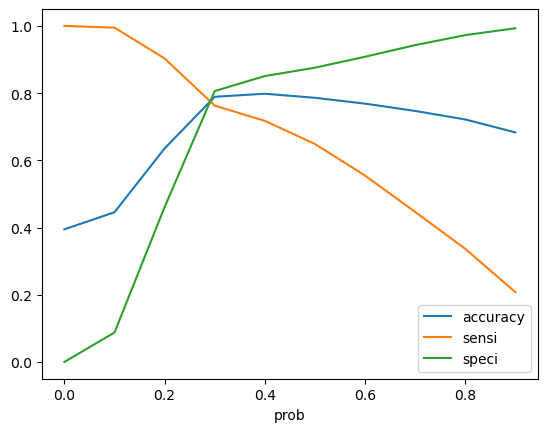

In [128]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we get the optimal values of the three metrics at 0.3, let's choose 0.3 as our cutoff now.

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.140600,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.199114,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.227734,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.169136,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.165994,0,1,1,0,0,0,0,0,0,0,0,0


In [131]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7890406705991928

In [132]:
# Sensitivity
TP/(TP+FN)

0.6487018095987411

In [133]:
# Specificity
TN/(TN+FP)

0.8756410256410256

## Precision and Recall View

In [135]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3415,  485],
       [ 893, 1649]], dtype=int64)

In [136]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7727272727272727

In [137]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6487018095987411

In [138]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7890406705991928

In [139]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3144,  756],
       [ 603, 1939]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Precision
TP/(TP+FP)

0.7194805194805195

In [142]:
# Recall
TP/(TP+FN)

0.7627852084972463